In [1]:
#考虑一个用于多类别分类的神经网络，结构如下：

#2 个 输入节点 (x_1, x_2) (输入一个批次的 (X))
#一个隐藏层，包含 2 个 神经元 (h_1, h_2)，使用 Tanh 激活函数。
#3 个 输出节点（对应3个类别） (y_{pred,1}, y_{pred,2}, y_{pred,3})，使用 Softmax 激活函数。

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#激活函数tanh
def tanh(a):
  return np.tanh(a)

In [13]:
#softmax激活函数
def softmax(a):
  a_max = np.max(a, axis=1, keepdims=True)
  z = np.exp(a-a_max)

  sums = np.sum(z, axis=1, keepdims=True)
  return z / sums

In [31]:
#前向传播，求y_pred
def farword(w1, w2, b1, b2, x):
  z = np.dot(x, w1) + b1 #shape (2,2)
  h = tanh(z)

  zout = np.dot(h, w2) + b2 #shape (2,3)
  y_pred = softmax(zout)

  return h, y_pred


In [79]:
#求损失函数loss
def compute_loss(y_true, y_pred):
  loss = -np.sum(y_true * np.log(y_pred + 1e-10))/ y_pred.shape[0]
  return loss #shape (2,3)

In [74]:
#反向传播,计算梯度值
def backward(y_pred, y_true, h, w2, x):
  dzout = y_pred - y_true
  b2_grad = np.mean(dzout, axis=0, keepdims=True).flatten()
  w2_grad = np.dot(h, dzout) #shape (2,3)

  dh = np.dot(dzout, w2.T)
  dz = dh * (1-h**2)
  b1_grad = np.mean(dz, axis=0, keepdims=True).flatten()
  w1_grad = np.dot(x, dz) #shape (2,2)
  return w1_grad, w2_grad, b1_grad, b2_grad

In [33]:
#参数更新
def update_params(w1, w2, b1, b2, w1_grad, w2_grad, b1_grad, b2_grad, learning_rate):
    w1 -= learning_rate * w1_grad
    w2 -= learning_rate * w2_grad
    b1 -= learning_rate * b1_grad
    b2 -= learning_rate * b2_grad
    return w1, w2, b1, b2

Epochs: 1 loss: 1.2066 w1: [ 0.1  -0.2   0.3   0.11] w2: [ 0.2  -0.09  0.29  0.4   0.1  -0.2 ] b1: [ 0.1 -0.1] b2: [ 0.09 -0.19  0.1 ]
Epochs: 11 loss: 1.1049 w1: [ 0.05 -0.24  0.3   0.19] w2: [ 0.2   0.    0.2   0.44  0.06 -0.2 ] b1: [ 0.09 -0.14] b2: [-0.01 -0.13  0.13]
Epochs: 21 loss: 1.0248 w1: [ 0.03 -0.29  0.3   0.27] w2: [ 0.2   0.09  0.12  0.48  0.03 -0.21] b1: [ 0.08 -0.18] b2: [-0.09 -0.07  0.16]
Epochs: 31 loss: 0.9569 w1: [ 0.03 -0.32  0.31  0.34] w2: [ 0.2   0.17  0.03  0.53  0.01 -0.24] b1: [ 0.07 -0.22] b2: [-0.17 -0.01  0.18]
Epochs: 41 loss: 0.8939 w1: [ 0.04 -0.36  0.33  0.4 ] w2: [ 0.21  0.26 -0.07  0.57  0.   -0.27] b1: [ 0.07 -0.25] b2: [-0.23  0.04  0.2 ]
Epochs: 51 loss: 0.8297 w1: [ 0.06 -0.39  0.36  0.46] w2: [ 0.22  0.35 -0.16  0.61 -0.01 -0.31] b1: [ 0.07 -0.28] b2: [-0.29  0.08  0.21]
Epochs: 61 loss: 0.7601 w1: [ 0.1  -0.41  0.39  0.52] w2: [ 0.22  0.45 -0.26  0.66 -0.02 -0.34] b1: [ 0.07 -0.31] b2: [-0.34  0.12  0.22]
Epochs: 71 loss: 0.6836 w1: [ 0.16 -0

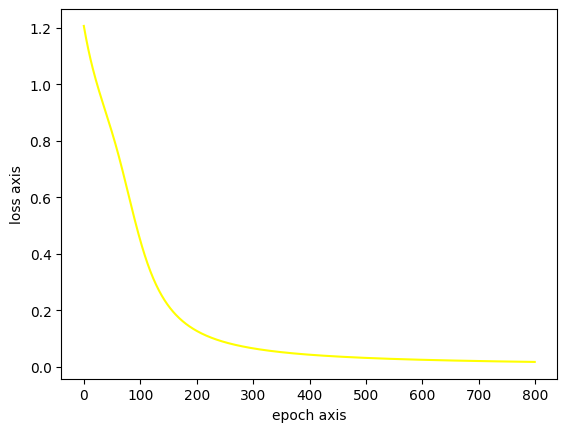

In [80]:
w1 = np.array([[0.1, -0.2],
        [0.3, 0.1]]) #shape (2,2)

b1 = np.array([0.1, -0.1]) #shape (2,)


w2 = np.array([[0.2, -0.1, 0.3],
        [0.4, 0.1, -0.2]])

b2 = np.array([0.1, -0.2, 0.1])

x = np.array([[1.0, 0.5],
        [-0.5, -1.0]]) #shape (2,2)

y_true = np.array([[0, 1, 0],
          [0, 0, 1]]) #shape (2,3)

learning_rate = 0.03
losses = []
epochs = 800

for epoch in range(epochs):
  h, y_pred = farword(w1, w2, b1, b2, x)
  loss = compute_loss(y_true, y_pred)
  losses.append(loss)

  w1_grad, w2_grad, b1_grad, b2_grad = backward(y_pred, y_true, h, w2, x)
  w1, w2, b1, b2 = update_params(w1, w2, b1, b2, w1_grad, w2_grad, b1_grad, b2_grad, learning_rate)

  if epoch%10 == 0:
    print("Epochs:", epoch + 1,
      "loss:", np.round(loss, 4),
      "w1:", np.round(w1.flatten(), 2),
      "w2:", np.round(w2.flatten(), 2),
      "b1:", np.round(b1.flatten(), 2),
      "b2:", np.round(b2.flatten(), 2)
      )

plt.plot(range(epochs), losses, "yellow")
plt.xlabel("epoch axis")
plt.ylabel("loss axis")
plt.show()

In [38]:
import torch
import matplotlib.pyplot as plt

In [68]:
#torch前向传播
def th_forward(w1, w2, b1, b2, x):
  z = torch.matmul(x, w1) + b1 #shape (2,2)
  h = torch.tanh(z)

  zout = torch.matmul(h, w2) + b2 #shape (2,3)
  y_pred = torch.softmax(zout, dim=0)

  return y_pred

In [76]:
#求损失函数loss
def th_compute_loss(y_true, y_pred):
  loss = -torch.sum(y_true * torch.log(y_pred + 1e-10))/ y_pred.shape[0]
  return loss #shape (2,3)

Epochs: 1 loss: 0.7651 w1: [ 0.1 -0.2  0.3  0.1] w2: [ 0.2 -0.1  0.3  0.4  0.1 -0.2] b1: [ 0.1 -0.1] b2: [ 0.1 -0.2  0.1]
Epochs: 11 loss: 0.7347 w1: [ 0.06 -0.16  0.26  0.14] w2: [ 0.2  -0.06  0.25  0.4   0.09 -0.19] b1: [ 0.1 -0.1] b2: [ 0.1 -0.2  0.1]
Epochs: 21 loss: 0.7139 w1: [ 0.03 -0.13  0.22  0.17] w2: [ 0.2  -0.02  0.22  0.4   0.09 -0.19] b1: [ 0.1 -0.1] b2: [ 0.1 -0.2  0.1]
Epochs: 31 loss: 0.698 w1: [ 0.  -0.1  0.2  0.2] w2: [ 0.2   0.    0.19  0.4   0.1  -0.2 ] b1: [ 0.1 -0.1] b2: [ 0.1 -0.2  0.1]
Epochs: 41 loss: 0.6838 w1: [-0.02 -0.07  0.18  0.23] w2: [ 0.2   0.02  0.17  0.4   0.11 -0.21] b1: [ 0.1 -0.1] b2: [ 0.1 -0.2  0.1]
Epochs: 51 loss: 0.6688 w1: [-0.03 -0.03  0.16  0.27] w2: [ 0.2   0.04  0.16  0.4   0.13 -0.24] b1: [ 0.1 -0.1] b2: [ 0.1 -0.2  0.1]
Epochs: 61 loss: 0.6507 w1: [-0.04  0.01  0.15  0.31] w2: [ 0.2   0.05  0.14  0.4   0.16 -0.26] b1: [ 0.1  -0.09] b2: [ 0.1 -0.2  0.1]
Epochs: 71 loss: 0.6278 w1: [-0.05  0.06  0.14  0.35] w2: [ 0.2   0.06  0.13  0.4  

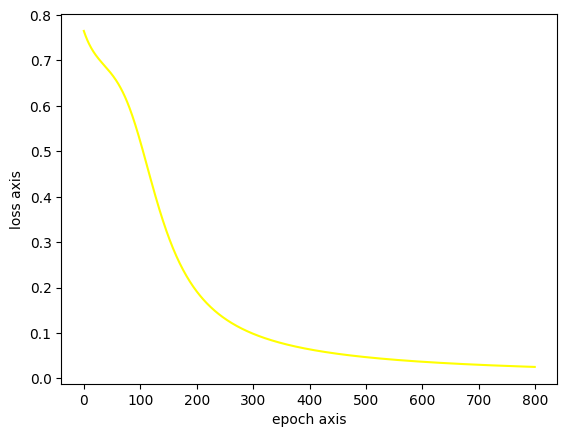

In [77]:
#初始化torch参数
w1 = torch.tensor([[0.1, -0.2],
        [0.3, 0.1]],requires_grad=True) #shape (2,2)

b1 = torch.tensor([0.1, -0.1],requires_grad=True) #shape (2,)


w2 = torch.tensor([[0.2, -0.1, 0.3],
        [0.4, 0.1, -0.2]],requires_grad=True)

b2 = torch.tensor([0.1, -0.2, 0.1],requires_grad=True)

x = torch.tensor([[1.0, 0.5],
        [-0.5, -1.0]]) #shape (2,2)

y_true = torch.tensor([[0, 1, 0],
          [0, 0, 1]]) #shape (2,3)

learning_rate = 0.03
losses = []
epochs = 800

for epoch in range(epochs):
  y_pred = th_forward(w1, w2, b1, b2, x)
  loss = th_compute_loss(y_true, y_pred)
  losses.append(loss.item())

  if w1.grad is not None:
    w1.grad.zero_()
    w2.grad.zero_()
    b1.grad.zero_()
    b2.grad.zero_()

  loss.backward()

  with torch.no_grad():
    w1 -= learning_rate * w1.grad
    w2 -= learning_rate * w2.grad
    b1 -= learning_rate * b1.grad
    b2 -= learning_rate * b2.grad

  if epoch%10 == 0:
    print(f"Epochs: {epoch + 1}",
      f"loss: {np.round(loss.item(), 4)}",
      f"w1: {w1.flatten().detach().numpy().round(2)}",
      f"w2: {w2.flatten().detach().numpy().round(2)}",
      f"b1: {b1.flatten().detach().numpy().round(2)}",
      f"b2: {b2.flatten().detach().numpy().round(2)}"
      )

plt.plot(range(epochs), losses, "yellow")
plt.xlabel("epoch axis")
plt.ylabel("loss axis")
plt.show()